# ggmModel tests

Below you'll find numerical tests to verify our algorithm.

In [1]:
%matplotlib inline
import pylab as pl
import numpy as np
import commands
import scipy.stats

## ER branch

In [2]:
status, output = commands.getstatusoutput("make")

print 'Make output: \n', output, '\n\n'

N = 10000
K = 20.
output_fname = "output.dat"

command = "time ./ggmModel $RANDOM " + str(N) + " " + str(K) + " 1.0 " + output_fname
print "Running: \n", command + "\n"
status, output = commands.getstatusoutput(command)

print 'ggmModel output: \n----\n', output, '\n---\n'

Make output: 
rm -f *~
g++ -Wall -O2 -std=c++11 ggmModel.cpp -o ggmModel
ggmModel.cpp: In function ‘int main(int, char**)’:
ggmModel.cpp:29:19: warning: variable ‘HashNds’ set but not used [-Wunused-but-set-variable]
   double *CumDg, *HashNds;
                   ^ 


Running: 
time ./ggmModel $RANDOM 10000 20.0 1.0 output.dat

ggmModel output: 
----

real	0m0.559s
user	0m0.151s
sys	0m0.407s 
---



In [3]:
Conns = np.loadtxt(output_fname)
print 'Data shape: ', Conns.shape

Data shape:  (399820, 2)


In [4]:
Degrees = np.zeros( (N), dtype=int)
C = Conns[:,0]
for j in range(N):
    Degrees[j] = np.where(C == j)[0].shape[0]

In [5]:
print 'Mean degree: \t\t', Degrees.mean()
print 'Standard deviation: \t', Degrees.std()

Mean degree: 		39.982
Standard deviation: 	4.48295393686


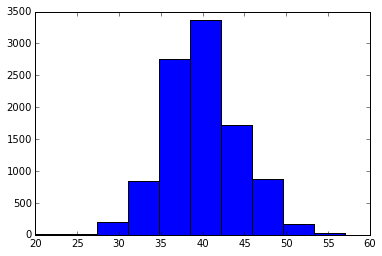

In [6]:
pl.hist(Degrees, 10)
pl.show()